In [33]:
import sympy as smp
import matplotlib.pyplot as plt
import numpy as np
from sympy.physics.control.control_plots import impulse_response_plot
from sympy.physics.control.control_plots import bode_plot
from sympy.abc import s
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
from sympy.physics.control.control_plots import impulse_response_plot
from sympy.physics.control.control_plots import step_response_plot

In [34]:
s = smp.symbols('s', complex=True)
m1, m2, k2, b2, b3 = smp.symbols('m1 m2 k2 b2 b3', real = True)
Y1 = smp.Function("Y1")(s)
Y2 = smp.Function("Y2")(s)
U = smp.Function("U")(s)

In [35]:
eq1 = smp.Eq(Y1*(m1*s**2 + b2*s + k2) - Y2*(b2*s + k2), 0)
eq2 = smp.Eq(Y2*(m2*s**2 + (b2 + b3)*s + k2) - Y1*(b2*s + k2), b3*s*U)

In [36]:
solve = smp.linsolve([eq1, eq2], Y1,Y2)

In [37]:
solve_ = solve.args[0]

In [38]:
tf1 = solve_[0]
tf2 = solve_[1]

In [39]:
tf1 = tf1/U
ft1 = tf1.simplify()

tf2 = tf2/U
ft2 = tf2.simplify()

In [40]:
ft1

b3*(b2*s + k2)/(b2*b3*s + b2*m1*s**2 + b2*m2*s**2 + b3*k2 + b3*m1*s**2 + k2*m1*s + k2*m2*s + m1*m2*s**3)

In [41]:
print(ft1)

b3*(b2*s + k2)/(b2*b3*s + b2*m1*s**2 + b2*m2*s**2 + b3*k2 + b3*m1*s**2 + k2*m1*s + k2*m2*s + m1*m2*s**3)


In [42]:
ft2

b3*(b2*s + k2 + m1*s**2)/(b2*b3*s + b2*m1*s**2 + b2*m2*s**2 + b3*k2 + b3*m1*s**2 + k2*m1*s + k2*m2*s + m1*m2*s**3)

In [43]:
print(ft2)

b3*(b2*s + k2 + m1*s**2)/(b2*b3*s + b2*m1*s**2 + b2*m2*s**2 + b3*k2 + b3*m1*s**2 + k2*m1*s + k2*m2*s + m1*m2*s**3)


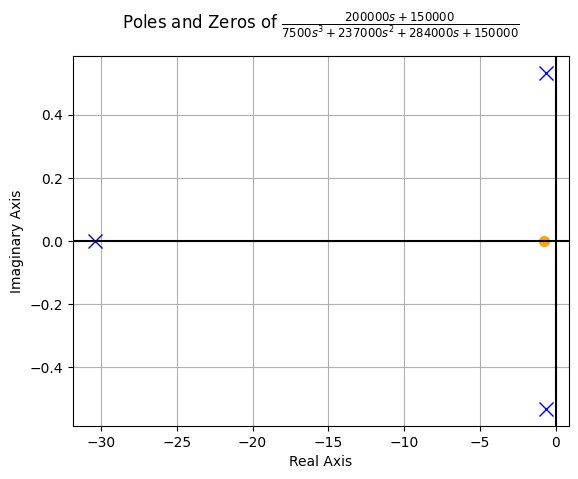

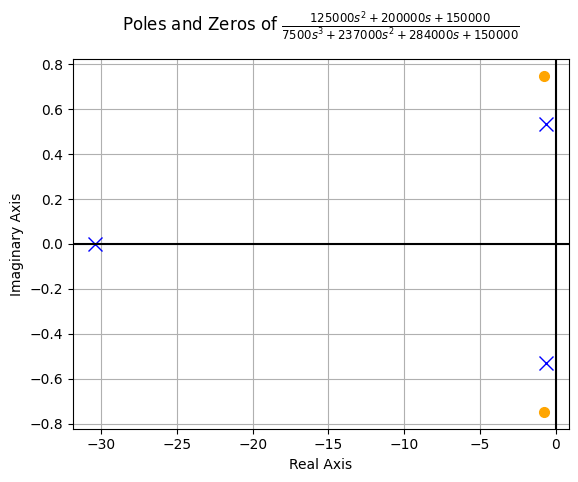

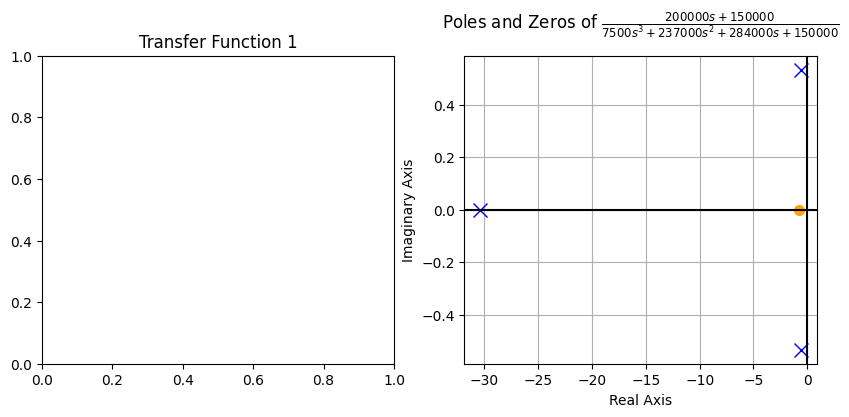

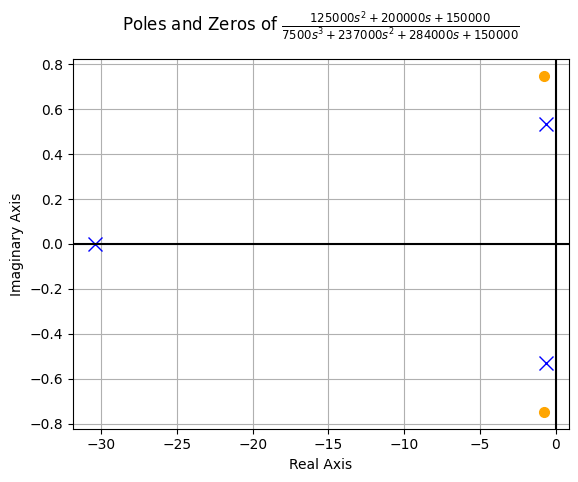

<Figure size 640x480 with 0 Axes>

In [44]:
b2 = 400
b3 = 500
k2 = 300
m1 = 250
m2 = 30


ft11 = TransferFunction(b3*(b2*s + k2), (b2*b3*s + b2*m1*s**2 + b2*m2*s**2 + b3*k2 + b3*m1*s**2 + k2*m1*s + k2*m2*s + m1*m2*s**3), s)
pole_zero_plot(ft11)
ft22 = TransferFunction(b3*(b2*s + k2 + m1*s**2), (b2*b3*s + b2*m1*s**2 + b2*m2*s**2 + b3*k2 + b3*m1*s**2 + k2*m1*s + k2*m2*s + m1*m2*s**3), s)
pole_zero_plot(ft22)

# Create a figure with subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first transfer function in the first subplot
axs[0].set_title('Transfer Function 1')
pole_zero_plot(ft11, plot=True, ax=axs[0])

# Plot the second transfer function in the second subplot
axs[1].set_title('Transfer Function 2')
pole_zero_plot(ft22, plot=True, ax=axs[1])

# Adjust the layout
plt.tight_layout()
plt.show()

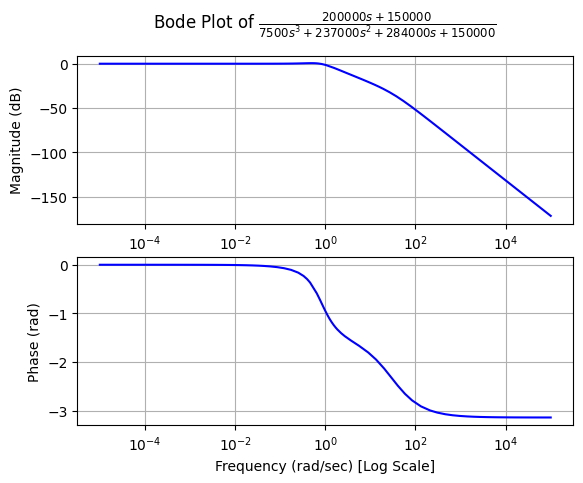

In [45]:
bode_plot(ft11, initial_exp=-5, final_exp=5) 

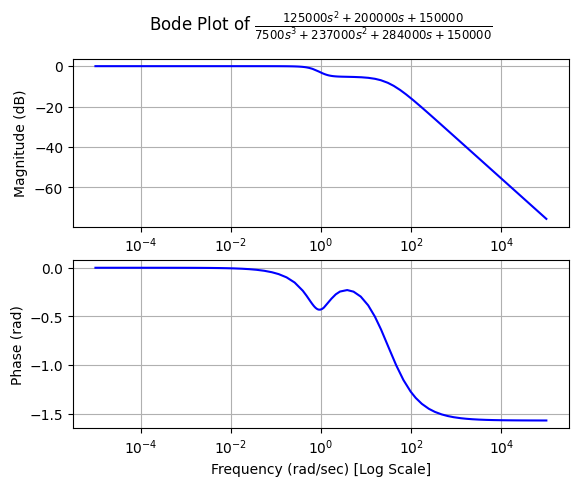

In [46]:
bode_plot(ft22, initial_exp=-5, final_exp=5) 

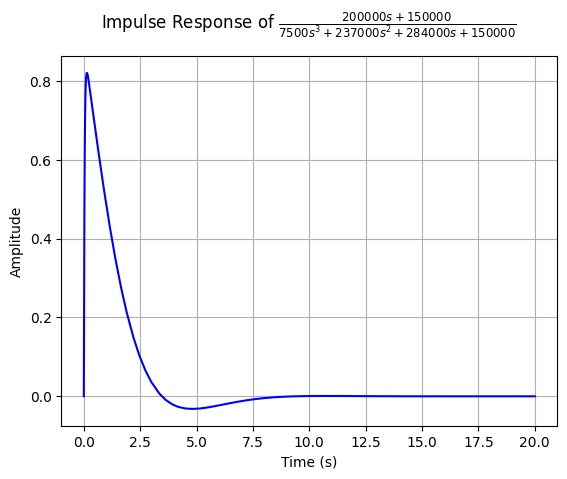

In [47]:
impulse_response_plot(ft11, upper_limit=20)   

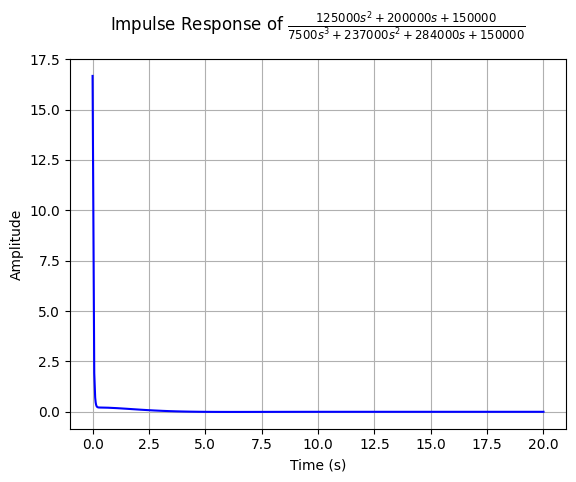

In [48]:
impulse_response_plot(ft22, upper_limit=20)   

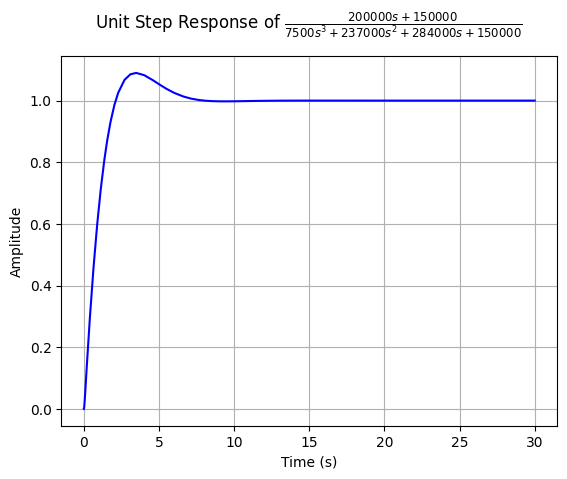

In [49]:
step_response_plot(ft11, upper_limit=30)

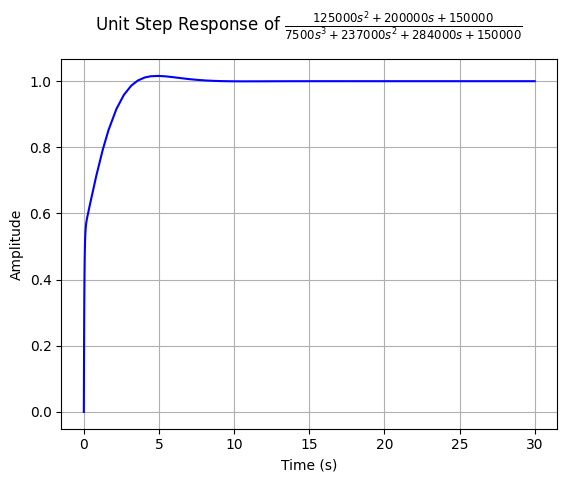

In [50]:
step_response_plot(ft22, upper_limit=30)